# Diabetes Hospitalizations in Chicago (ZIP Code Groupings)

This notebook examines geographic patterns in diabetes-related hospitalizations
across Chicago ZIP code groupings. The analysis focuses on identifying variation
in hospitalization rates, with emphasis on a five-year summary period
(2007–2011).

This notebook mirrors the analytical approach used for asthma hospitalizations
to allow for meaningful comparison across chronic conditions.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
diabetes = pd.read_csv("../data/diabetes_hospitalizations.csv")
diabetes.head()

,ZIP code (or aggregate),Hospitalizations 2000,Crude Rate 2000,Crude Rate 2000 Lower CI,Crude Rate 2000 Upper CI,Adjusted Rate 2000,Adjusted Rate 2000 Lower CI,Adjusted Rate 2000 Upper CI,Hospitalizations 2001,Crude Rate 2001,...,Adjusted Rate 2010,Adjusted Rate 2010 Lower CI,Adjusted Rate 2010 Upper CI,Hospitalizations 2011,Crude Rate 2011,Crude Rate 2011 Lower CI,Crude Rate 2011 Upper CI,Adjusted Rate 2011,Adjusted Rate 2011 Lower CI,Adjusted Rate 2011 Upper CI
0,"60601, 60602, 60603, 60604, 60605 & 60611",57.0,12.7,9.6,16.4,11.9,9.0,15.2,60.0,12.7,...,7.4,5.5,9.6,40.0,6.0,4.3,8.2,6.1,4.4,8.2
1,"60606, 60607 & 60661",41.0,19.0,13.6,25.7,27.3,19.3,36.6,30.0,13.1,...,11.5,7.1,16.9,31.0,9.1,6.2,12.9,17.4,11.3,24.9
2,60608,211.0,22.8,19.7,25.9,33.3,28.7,38.1,193.0,21.1,...,28.1,24.1,32.5,207.0,25.0,21.6,28.4,30.2,26.1,34.6
3,60609,242.0,30.5,26.6,34.3,40.6,35.4,46.3,176.0,22.6,...,37.6,32.4,43.2,176.0,27.1,23.1,31.1,32.6,27.8,37.8
4,60610 & 60654,80.0,16.8,13.4,21.0,17.9,14.1,22.0,79.0,16.5,...,15.1,11.8,18.7,78.0,14.8,11.7,18.5,15.4,12.1,19.0


In [6]:
diabetes.shape

(49, 85)

In [8]:
diabetes.columns

Index(['ZIP code (or aggregate)', 'Hospitalizations 2000', 'Crude Rate 2000',
       'Crude Rate 2000 Lower CI', 'Crude Rate 2000 Upper CI',
       'Adjusted Rate 2000', 'Adjusted Rate 2000 Lower CI',
       'Adjusted Rate 2000 Upper CI', 'Hospitalizations 2001',
       'Crude Rate 2001', 'Crude Rate 2001 Lower CI',
       'Crude Rate 2001 Upper CI', 'Adjusted Rate 2001',
       'Adjusted Rate 2001 Lower CI', 'Adjusted Rate 2001 Upper CI',
       'Hospitalizations 2002', 'Crude Rate 2002', 'Crude Rate 2002 Lower CI',
       'Crude Rate 2002 Upper CI', 'Adjusted Rate 2002',
       'Adjusted Rate 2002 Lower CI', 'Adjusted Rate 2002 Upper CI',
       'Hospitalizations 2003', 'Crude Rate 2003', 'Crude Rate 2003 Lower CI',
       'Crude Rate 2003 Upper CI', 'Adjusted Rate 2003',
       'Adjusted Rate 2003 Lower CI', 'Adjusted Rate 2003 Upper CI',
       'Hospitalizations 2004', 'Crude Rate 2004', 'Crude Rate 2004 Lower CI',
       'Crude Rate 2004 Upper CI', 'Adjusted Rate 2004',
       'Ad

In [10]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 85 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ZIP code (or aggregate)      49 non-null     object 
 1   Hospitalizations 2000        47 non-null     float64
 2   Crude Rate 2000              48 non-null     float64
 3   Crude Rate 2000 Lower CI     48 non-null     float64
 4   Crude Rate 2000 Upper CI     48 non-null     float64
 5   Adjusted Rate 2000           48 non-null     float64
 6   Adjusted Rate 2000 Lower CI  48 non-null     float64
 7   Adjusted Rate 2000 Upper CI  48 non-null     float64
 8   Hospitalizations 2001        47 non-null     float64
 9   Crude Rate 2001              48 non-null     float64
 10  Crude Rate 2001 Lower CI     48 non-null     float64
 11  Crude Rate 2001 Upper CI     48 non-null     float64
 12  Adjusted Rate 2001           48 non-null     float64
 13  Adjusted Rate 2001 Low

## Data Structure

Each row represents a Chicago ZIP code grouping. For each year between 2000 and
2011, the dataset reports diabetes-related hospitalization counts and rates,
including age-adjusted hospitalization rates.

In [13]:
years = [2007, 2008, 2009, 2010, 2011]

rate_columns = [
    f"Adjusted Rate {year}" for year in years
]

rate_columns

['Adjusted Rate 2007',
 'Adjusted Rate 2008',
 'Adjusted Rate 2009',
 'Adjusted Rate 2010',
 'Adjusted Rate 2011']

In [15]:
diabetes_5yr = diabetes[["ZIP code (or aggregate)"] + rate_columns].copy()

diabetes_5yr = diabetes_5yr.rename(
    columns={"ZIP code (or aggregate)": "zip_group"}
)

diabetes_5yr.head()

,zip_group,Adjusted Rate 2007,Adjusted Rate 2008,Adjusted Rate 2009,Adjusted Rate 2010,Adjusted Rate 2011
0,"60601, 60602, 60603, 60604, 60605 & 60611",8.4,6.8,8.3,7.4,6.1
1,"60606, 60607 & 60661",19.2,30.5,16.5,11.5,17.4
2,60608,27.5,27.5,27.3,28.1,30.2
3,60609,41.7,34.1,39.1,37.6,32.6
4,60610 & 60654,12.2,14.1,12.7,15.1,15.4


In [17]:
diabetes_5yr.isna().sum()

zip_group             0
Adjusted Rate 2007    0
Adjusted Rate 2008    0
Adjusted Rate 2009    0
Adjusted Rate 2010    0
Adjusted Rate 2011    0
dtype: int64

In [19]:
diabetes_5yr["avg_adjusted_rate_2007_2011"] = diabetes_5yr[
    rate_columns
].mean(axis=1, skipna=True)

diabetes_5yr.head()

,zip_group,Adjusted Rate 2007,Adjusted Rate 2008,Adjusted Rate 2009,Adjusted Rate 2010,Adjusted Rate 2011,avg_adjusted_rate_2007_2011
0,"60601, 60602, 60603, 60604, 60605 & 60611",8.4,6.8,8.3,7.4,6.1,7.40
1,"60606, 60607 & 60661",19.2,30.5,16.5,11.5,17.4,19.02
2,60608,27.5,27.5,27.3,28.1,30.2,28.12
3,60609,41.7,34.1,39.1,37.6,32.6,37.02
4,60610 & 60654,12.2,14.1,12.7,15.1,15.4,13.90


In [21]:
diabetes_5yr_sorted = diabetes_5yr.sort_values(
    by="avg_adjusted_rate_2007_2011",
    ascending=False
)

diabetes_5yr_sorted[["zip_group", "avg_adjusted_rate_2007_2011"]].head(10)

,zip_group,avg_adjusted_rate_2007_2011
14,60621,59.32
33,60644,55.88
26,60636,55.66
17,60624,53.26
5,60612,51.82
38,60651,51.72
20,60628,50.26
12,60619,49.62
37,60649,49.62
13,60620,47.68


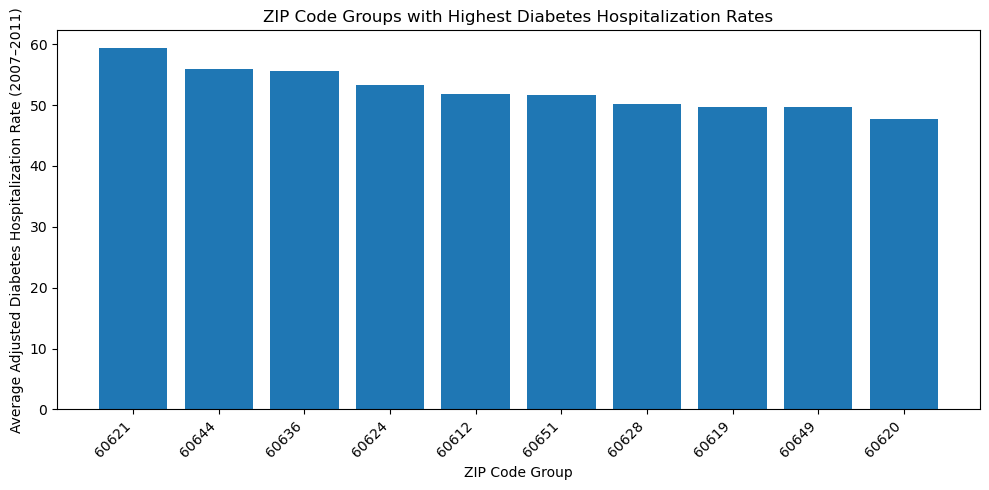

In [23]:
top_zip = diabetes_5yr_sorted.head(10)

plt.figure(figsize=(10, 5))
plt.bar(top_zip["zip_group"], top_zip["avg_adjusted_rate_2007_2011"])
plt.xticks(rotation=45, ha="right")
plt.xlabel("ZIP Code Group")
plt.ylabel("Average Adjusted Diabetes Hospitalization Rate (2007–2011)")
plt.title("ZIP Code Groups with Highest Diabetes Hospitalization Rates")
plt.tight_layout()
plt.show()

## Persistent Diabetes Hospitalization Burden (2007–2011)

A subset of ZIP code groupings experiences consistently elevated diabetes
hospitalization rates across the five-year period analyzed. These findings
suggest persistent geographic disparities in diabetes-related hospitalization
burden across Chicago.